# Q2 a)

In [26]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Preprocessing dataset

In [27]:
df = pd.read_csv("voice.csv")

features = df.drop(columns=["label"]).values
labels = df["label"].values

label_map = {"male": 0, "female": 1}

labels = [label_map[label] for label in labels]
le = LabelEncoder()
labels = le.fit_transform(labels)
labels = to_categorical(labels, num_classes=2)

# For pytorch

In [28]:
# for pytorch:
label = torch.tensor(labels, dtype=torch.float)
data = torch.tensor(features, dtype=torch.float)

# Class for a 1D convolutional neural network

In [29]:
class Conv1DNN(nn.Module):
    def __init__(self):
        super(Conv1DNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, 5, stride=1)
        self.fc1 = nn.Linear(512, 2)
        self.fc2 = nn.Linear(64, 2)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.dropout(x)
        x = torch.flatten(x)

        # print(x.shape)
        # x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc1(x))
        # print(x)
        return x

# Making a model from the neural network

In [30]:
model = Conv1DNN()
total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Number of parameters: 1348


In [31]:
arr_t_acc = []
arr_v_acc = []
arr_t_loss = []
arr_v_loss = []

# Training the neural network 

In [32]:
def train_conv(x, y, val_d, val_l, num_epochs=60):
    for epoch in range(num_epochs):
        model.train()
        total_correct = 0
        total_samples = 0
        t_loss = 0.0
        for j in range(len(x)):
            optimizer.zero_grad()

            outputs = model(x[j].unsqueeze(0))

            loss = criterion(outputs, y[j])
            loss.backward()
            optimizer.step()
            t_loss += loss.item()

            predicted = torch.round(outputs)

            total_correct += (predicted == y[j]).sum().item()
            total_samples += y[j].size(0)
        t_loss /= len(x)

        correct = 0
        total = 0
        v_loss = 0.0
        with torch.no_grad():
            for j in range(len(val_d)):
                outputs = model(val_d[j].unsqueeze(0))
                loss = criterion(outputs, y[j])
                v_loss += loss.item()
                predicted = torch.round(outputs)
                total += val_l[j].size(0)
                correct += (predicted == val_l[j]).sum().item()
        v_loss /= len(val_d)

        v_acc = 100 * correct / total

        t_acc = 100 * total_correct / total_samples
        arr_t_acc.append(t_acc)
        arr_v_acc.append(v_acc)
        arr_t_loss.append(t_loss)
        arr_v_loss.append(v_loss)
        print(
            f'Epoch {epoch + 1}: Train Accuracy = {t_acc:.2f}%, Validation Accuracy = {v_acc:.2f}%, Train Loss: {t_loss:.4f}, validation Loss: {v_loss:.4f}')


In [33]:
# print(data.shape)
t_and_v_data, test_data, t_and_v_labels, test_labels = train_test_split(data, label, test_size=0.2)
train_data, val_data, train_labels, val_labels = train_test_split(t_and_v_data, t_and_v_labels, test_size=0.2)
train_conv(train_data, train_labels, val_data, val_labels)

Epoch 1: Train Accuracy = 52.81%, Validation Accuracy = 54.83%, Train Loss: 0.6803, validation Loss: 0.6887
Epoch 2: Train Accuracy = 55.11%, Validation Accuracy = 55.72%, Train Loss: 0.6667, validation Loss: 0.6889
Epoch 3: Train Accuracy = 56.39%, Validation Accuracy = 57.10%, Train Loss: 0.6594, validation Loss: 0.7053
Epoch 4: Train Accuracy = 58.63%, Validation Accuracy = 57.99%, Train Loss: 0.6508, validation Loss: 0.7105
Epoch 5: Train Accuracy = 56.54%, Validation Accuracy = 58.19%, Train Loss: 0.6755, validation Loss: 0.7058
Epoch 6: Train Accuracy = 59.15%, Validation Accuracy = 58.78%, Train Loss: 0.6444, validation Loss: 0.7178
Epoch 7: Train Accuracy = 59.42%, Validation Accuracy = 57.20%, Train Loss: 0.6414, validation Loss: 0.7520
Epoch 8: Train Accuracy = 60.01%, Validation Accuracy = 53.85%, Train Loss: 0.6317, validation Loss: 0.7015
Epoch 9: Train Accuracy = 61.08%, Validation Accuracy = 64.60%, Train Loss: 0.6193, validation Loss: 0.7296
Epoch 10: Train Accuracy = 6

# Plotting the results 

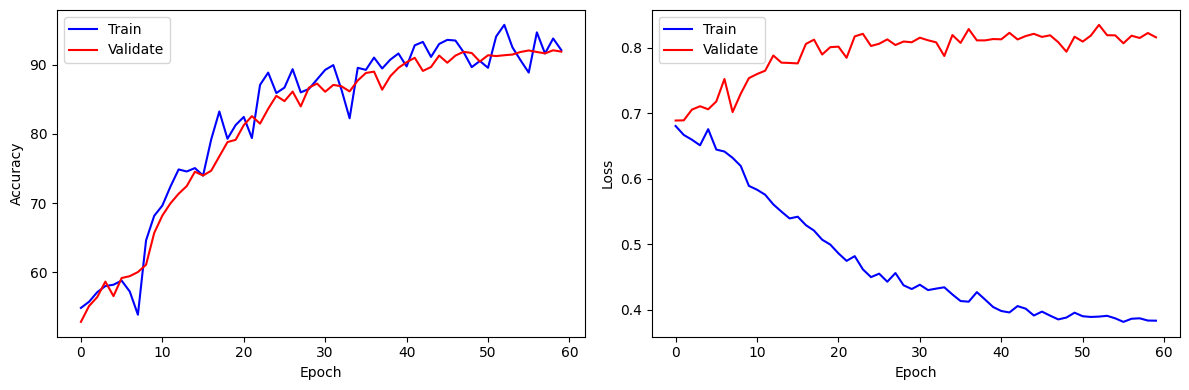

In [34]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(arr_v_acc, label='Train', color='blue')
plt.plot(arr_t_acc, label='Validate', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(arr_t_loss, label='Train', color='blue')
plt.plot(arr_v_loss, label='Validate', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Brain and Amy answers for Q2 a):

In [35]:
df = pd.read_csv("Amy-Acoustics.csv")
amy = df.drop(columns=["sound.files","selec","duration", "peakf"]).values
amy = np.delete(amy, 0, axis=1)

df = pd.read_csv("Brian-Acoustics.csv")
brain = df.drop(columns=["sound.files","selec","duration", "peakf"]).values
brain = np.delete(brain, 0, axis=1)

# print(amy)
# print(brain)

torch_brain = torch.tensor(brain, dtype=torch.float)
torch_amy = torch.tensor(amy, dtype=torch.float)
output_amy = model(torch_amy.unsqueeze(0))
output_brain = model(torch_brain.unsqueeze(0))
predicted_amy = torch.round(output_amy)
predicted_brain = torch.round(output_brain)

print(predicted_amy, predicted_brain)


tensor([0., 1.], grad_fn=<RoundBackward0>) tensor([1., 0.], grad_fn=<RoundBackward0>)


<h3>according to these answers Amy and Brain predictions are female and male<h3>

# Q2 b)

In [23]:
import numpy as np
import torch.nn as nn
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K

# Changing the dataset to image format

In [24]:
shaped_data = features.reshape(features.shape[0], 4, 5, 1)
# print(shaped_data.shape)
images = []
for i in range(len(shaped_data)):
    image = array_to_img(shaped_data[i])
    image = image.resize((32, 32))
    image = image.convert('RGB')
    image = img_to_array(image)
    # print(image)
    images.append(image)

images = np.array(images)

# Densenet neural network

In [25]:
def densenet(input_shape, n_classes, filters = 32):
    
    #batch norm + relu + conv
    def bn_rl_conv(x,filters,kernel=1,strides=1):
        
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, kernel, strides=strides,padding = 'same')(x)
        return x
    
    def dense_block(x, repetition):
        
        for _ in range(repetition):
            y = bn_rl_conv(x, 4*filters)
            y = bn_rl_conv(y, filters, 3)
            x = concatenate([y,x])
        return x
        
    def transition_layer(x):
        
        x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
        x = AvgPool2D(2, strides = 2, padding = 'same')(x)
        return x
    
    input = Input (input_shape)
    x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
    x = MaxPool2D(3, strides = 2, padding = 'same')(x)
    
    for repetition in [6,12,24,16]:
        
        d = dense_block(x, repetition)
        x = transition_layer(d)
    
    x = GlobalAveragePooling2D()(d)
    output = Dense(n_classes, activation = 'softmax')(x)
    
    model = Model(input, output)
    return model

input_shape = 32, 32, 3
n_classes = 2

model = densenet(input_shape,n_classes)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_121 (Conv2D) │ (None, 16, 16,    │      9,472 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 8, 8, 64)  │          0 │ conv2d_121[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ max_pooling2d_1[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_120 (ReLU)    │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_122 (Conv2D) │ (None, 8, 8, 128) │      8,320 │ re_lu_120[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 128) │        512 │ conv2d_122[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_121 (ReLU)    │ (None, 8, 8, 128) │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_123 (Conv2D) │ (None, 8, 8, 32)  │     36,896 │ re_lu_121[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_58      │ (None, 8, 8, 96)  │          0 │ conv2d_123[0][0], │
│ (Concatenate)       │                   │            │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 96)  │        384 │ concatenate_58[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_122 (ReLU)    │ (None, 8, 8, 96)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_124 (Conv2D) │ (None, 8, 8, 128) │     12,416 │ re_lu_122[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 128) │        512 │ conv2d_124[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_123 (ReLU)    │ (None, 8, 8, 128) │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_125 (Conv2D) │ (None, 8, 8, 32)  │     36,896 │ re_lu_123[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_59      │ (None, 8, 8, 128) │          0 │ conv2d_125[0][0], │
│ (Concatenate)       │                   │            │ concatenate_58[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 128) │        512 │ concatenate_59[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_124 (ReLU)    │ (None, 8, 8, 128) │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_126 (Conv2D) │ (None, 8, 8, 128) │     16,512 │ re_lu_124[0][0] 

 Total params: 7,045,442 (26.88 MB)

 Trainable params: 6,963,970 (26.57 MB)

 Non-trainable params: 81,472 (318.25 KB)

In [5]:
h = model.fit(images , labels, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 43s 86ms/step - accuracy: 0.5649 - loss: 1.1246 - val_accuracy: 0.9543 - val_loss: 0.3895
Epoch 2/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.6622 - loss: 0.6819 - val_accuracy: 0.9069 - val_loss: 0.3639
Epoch 3/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.7175 - loss: 0.5591 - val_accuracy: 0.6861 - val_loss: 0.4496
Epoch 4/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.7366 - loss: 0.5739 - val_accuracy: 0.8328 - val_loss: 0.7554
Epoch 5/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - accuracy: 0.7425 - loss: 0.5449 - val_accuracy: 0.7366 - val_loss: 0.4528
Epoch 6/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.7660 - loss: 0.5121 - val_accuracy: 0.8659 - val_loss: 0.2587
Epoch 7/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.7647 - loss: 0.5105 - val_accuracy: 0.7618 - val_loss: 0.4213
Epoch 8/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.7646 - loss: 0.4965 - 

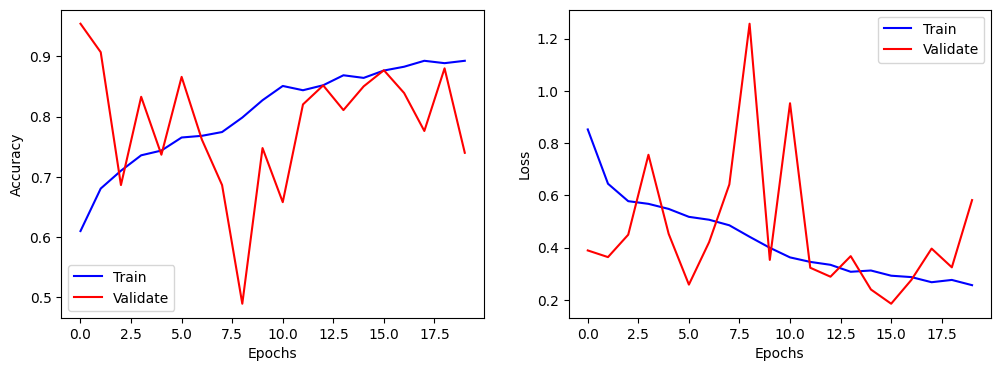

In [6]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(h.history['accuracy'], label='Train', color='blue')
plt.plot(h.history['val_accuracy'], label='Validate', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(h.history['loss'], label='Train', color='blue')
plt.plot(h.history['val_loss'], label='Validate', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Brain and Amy answers for Q2 b):

In [35]:
df = pd.read_csv("Amy-Acoustics.csv")
amy = df.drop(columns=["sound.files","selec","duration", "peakf"]).values
amy = np.delete(amy, 0, axis=1)

df = pd.read_csv("Brian-Acoustics.csv")
brain = df.drop(columns=["sound.files","selec","duration", "peakf"]).values
brain = np.delete(brain, 0, axis=1)

shaped_amy = amy.reshape((4, 5, 1))
image_amy = array_to_img(shaped_amy)
image_amy = image_amy.resize((32, 32))
image_amy = image_amy.convert('RGB')
image_amy = img_to_array(image_amy)

shaped_brain = brain.reshape((4, 5, 1))
image_brain = array_to_img(shaped_brain)
image_brain = image_brain.resize((32, 32))
image_brain = image_brain.convert('RGB')
image_brain = img_to_array(image_brain)


output_amy = model.predict(image_amy)
output_brain = model.predict(image_brain)

print(predicted_amy, predicted_brain)

<h3>according to these answers Amy and Brain predictions are female and male<h3>